# Homework 2

#### Courtesy: Dr. Tim Oates

#### Due date: Mon, Feb 26, 2024

In this homework we'll explore decision trees and overfitting, and learn about the right way to evaluate the performance of a classifier.

In [ ]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import random
from sklearn.tree import export_text
import matplotlib.pyplot as plt

In [115]:
def make_dataset(n, d = 4, p = 0):
    """
    Create a dataset with boolean features and a binary class label.
    The label is assigned as x1 ^ x2 V x3 ^ x4.
    
    Arguments:
      n - The number of instances to generate
      m - The number of features per instance.  Any features beyond the first four
          are irrelevant to determining the class label.
      p - The probability that the true class label as computed by the expression
          above is flipped.  Said differently, this is the probability of class noise.
    """
    
    assert d >= 4, 'The dataset must have at least 4 features'
    X = [np.random.randint(2, size = d) for _ in range(n)]
    y = [(x[0] and x[1]) or (x[2] and x[3]) for x in X]
    y = [v if random.random() >= p else (v + 1) % 2 for v in y]
    return X, y

When evaluating the accuracy of a classifier, the right way to do it is to have a test set of instances that were not used to train the classifier and measure on those instances.  The [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function in scikit makes it easy to create training and testing sets.  Below is an example that shows overfitting as evidenced by higher accuracy on the training set than the testing set.

In [116]:
# Create a dataset with 1000 instances, each with 10 attributes, and 10% class noise
X, y = make_dataset(1000, d = 10, p = 0.1)

In [117]:
# Make training and testing sets, each with half of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)

In [118]:
# Train the classifier and evaluate it on train/test splits
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Training accuracy: %.2f' % accuracy_score(y_train, clf.predict(X_train)))
print('Testing accuracy:  %.2f' % accuracy_score(y_test, clf.predict(X_test)))

Training accuracy: 0.96
Testing accuracy:  0.78


Note that if the training set has 0% class noise, we get a perfect tree.  Spend some time convincing yourself that the tree below captures the boolean expression that assigns class labels.

In [119]:
X, y = make_dataset(1000, d = 10, p = 0.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(export_text(clf))

|--- feature_3 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- class: 1



# Assignment

Explore the impact of the following on the extent of overfitting:
* The size of the dataset (n in the call to make_dataset)
* The number of irrelevant features (d in the call to make_dataset)
* The probability of class noise (p in the call to make_dataset)
* The minimum number of samples required for a node to be split.  That is the min_samples_split parameter to the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) constructor

<p>
    
Vary each of the parameters above and build learning curves for training and testing accuracy, plot them, and for each of the parameters write up an explanation for the impact the parameter has on overfitting.  Also, in each case, display at least one decision tree and explain what is happening that is making it overfit.

Here is an example of generating a learning curve for a fixed size dataset where the fraction of instances used for training is varied.  You can use this template to create your own learning curves.

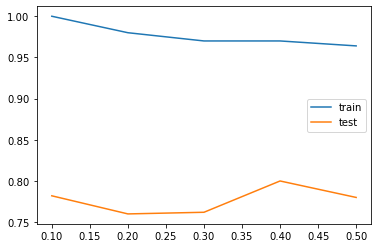

In [122]:
X, y = make_dataset(1000, d = 10, p = 0.1)

test_acc = []
train_acc = []
frac = [0.1, 0.2, 0.3, 0.4, 0.5]
for f in frac:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=f)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))
    
plt.plot(frac, train_acc, label = 'train')
plt.plot(frac, test_acc, label = 'test')
plt.legend()

In [123]:
print(export_text(clf))

|--- feature_2 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |---